In [1]:
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
import pickle
import random
import numpy as np
from tqdm import tqdm

In [2]:
labels = glob(os.path.join(os.getcwd(), 'data', '*'))
print(labels)


['F:\\studies\\datascience\\python\\pytorch\\finger_count\\data\\1', 'F:\\studies\\datascience\\python\\pytorch\\finger_count\\data\\2', 'F:\\studies\\datascience\\python\\pytorch\\finger_count\\data\\3', 'F:\\studies\\datascience\\python\\pytorch\\finger_count\\data\\4', 'F:\\studies\\datascience\\python\\pytorch\\finger_count\\data\\5']


In [3]:
train = []
for label in labels:
    imgs = glob(os.path.join(label, '*.jpg'))
    y = np.eye(5)[int(label.split('\\')[-1]) - 1].astype(int)
#     y = int(label.split('\\')[-1]) - 1
    for img in tqdm(imgs):
        i = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        i = cv2.resize(i, (50, 50)).astype(np.float32)
        train.append([i, y])


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:05<00:00,  9.72it/s]


In [4]:
print(train[0])

[array([[193., 194., 191., ..., 180., 183., 181.],
       [190., 190., 188., ..., 182., 180., 179.],
       [189., 191., 188., ..., 179., 181., 181.],
       ...,
       [ 67.,  49.,  63., ..., 164., 166., 164.],
       [ 52.,  65.,  62., ..., 162., 162., 165.],
       [ 56.,  56.,  59., ..., 163., 164., 161.]], dtype=float32), array([1, 0, 0, 0, 0])]


In [5]:
random.shuffle(train)

[0 0 1 0 0]


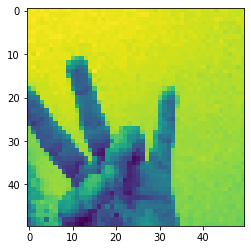

In [6]:
print(train[87][1])
plt.imshow(train[87][0])

In [7]:
pickle.dump(train, open(os.path.join(os.getcwd(), 'train_data.pickle'), 'wb'))